# BHARAT INTERN  Stock Prediction using LSTM

## Author : Pathan Mobina Sulthana

## importing required libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## importing and reading the dataset into dataframe df

In [33]:
df=pd.read_csv("stock_data.csv")

In [34]:
df

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...,...
3014,12/22/2017,71.42,71.87,71.22,71.58,10979165,AABA
3015,12/26/2017,70.94,71.39,69.63,69.86,8542802,AABA
3016,12/27/2017,69.77,70.49,69.69,70.06,6345124,AABA
3017,12/28/2017,70.12,70.32,69.51,69.82,7556877,AABA


## checking for incorrect datatypes

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


## Descriptive Statistics

In [36]:
df.describe(include="all")

,Date,Open,High,Low,Close,Volume,Name
count,3019,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03,3019
unique,3019,NaN,NaN,NaN,NaN,NaN,1
top,11/26/2012,NaN,NaN,NaN,NaN,NaN,AABA
freq,1,NaN,NaN,NaN,NaN,NaN,3019
mean,NaN,28.426479,28.766532,28.066558,28.412726,2.158391e+07,NaN
std,NaN,13.257242,13.356692,13.157326,13.258163,1.926231e+07,NaN
min,NaN,9.100000,9.480000,8.940000,8.950000,1.939061e+06,NaN
25%,NaN,16.175000,16.385000,15.970000,16.130000,1.248025e+07,NaN
50%,NaN,27.180000,27.490000,26.820000,27.100000,1.732130e+07,NaN
75%,NaN,36.655000,37.035000,36.305000,36.635000,2.512757e+07,NaN


In [37]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

## checking for null values.

In [38]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [39]:
df['Date'].apply(lambda x: x.split()[0])

0         1/3/2006
1         1/4/2006
2         1/5/2006
3         1/6/2006
4         1/9/2006
           ...    
3014    12/22/2017
3015    12/26/2017
3016    12/27/2017
3017    12/28/2017
3018    12/29/2017
Name: Date, Length: 3019, dtype: object

## Created Month and Year columns for analysis.

In [40]:
df["Date"]=pd.to_datetime(df["Date"])

In [41]:
df["month"]=[i.month  for i in df["Date"]]

In [42]:
df["year"]=[i.year for i in df["Date"]]

## Plotting yearly Open and Close trends.

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='Open'>

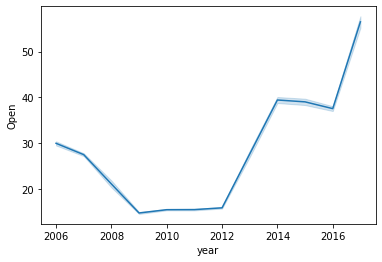

In [43]:
import  seaborn as sns
sns.lineplot(df["year"],df["Open"])


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='Close'>

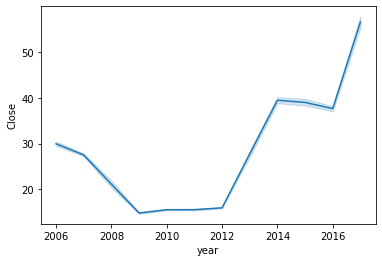

In [44]:
sns.lineplot(df["year"],df["Close"])

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
data = df.filter(['Close']).values

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))




In [47]:
scaled_data = scaler.fit_transform(data)

## Defining training and testing data.

In [48]:
training_size = int(len(scaled_data) * 0.65)
train_data = scaled_data[:training_size,0 :1]
test_data = scaled_data[training_size:, 0:1]

In [49]:
test_data

array([[0.3924664 ],
       [0.39059081],
       [0.37746171],
       ...,
       [0.95514223],
       [0.95139106],
       [0.95185996]])

In [50]:
train_data

array([[0.4995311 ],
       [0.5004689 ],
       [0.50922163],
       ...,
       [0.37730541],
       [0.37183495],
       [0.38261957]])

In [51]:
def create_sequences(data, time_step):
    X = []
    y = []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

time_step = 100
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)


In [52]:
# Flatten the input data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [53]:
X_train_flattened

array([[0.4995311 , 0.5004689 , 0.50922163, ..., 0.34088778, 0.35698656,
        0.37464833],
       [0.5004689 , 0.50922163, 0.53547984, ..., 0.35698656, 0.37464833,
        0.37621132],
       [0.50922163, 0.53547984, 0.53876211, ..., 0.37464833, 0.37621132,
        0.36026883],
       ...,
       [0.27164739, 0.26758362, 0.26351985, ..., 0.39387309, 0.3915286 ,
        0.38183807],
       [0.26758362, 0.26351985, 0.27164739, ..., 0.3915286 , 0.38183807,
        0.37730541],
       [0.26351985, 0.27164739, 0.27117849, ..., 0.38183807, 0.37730541,
        0.37183495]])

In [54]:
X_test_flattened

array([[0.3924664 , 0.39059081, 0.37746171, ..., 0.4462332 , 0.44201313,
        0.44779619],
       [0.39059081, 0.37746171, 0.37714911, ..., 0.44201313, 0.44779619,
        0.47139731],
       [0.37746171, 0.37714911, 0.36417631, ..., 0.44779619, 0.47139731,
        0.47671147],
       ...,
       [0.77461707, 0.79837449, 0.79571741, ..., 0.97905595, 0.97889966,
        0.95201626],
       [0.79837449, 0.79571741, 0.79431072, ..., 0.97889966, 0.95201626,
        0.95514223],
       [0.79571741, 0.79431072, 0.76711472, ..., 0.95201626, 0.95514223,
        0.95139106]])

## Importing required libraries for LSTM

In [56]:
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.models  import Sequential

## Creating LSTM model.

In [57]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
59/59 [==============================] - 12s 85ms/step - loss: 0.0020
Epoch 2/10
59/59 [==============================] - 5s 83ms/step - loss: 3.5456e-04
Epoch 3/10
59/59 [==============================] - 5s 83ms/step - loss: 3.2894e-04
Epoch 4/10
59/59 [==============================] - 5s 87ms/step - loss: 3.0803e-04
Epoch 5/10
59/59 [==============================] - 5s 83ms/step - loss: 2.8528e-04
Epoch 6/10
59/59 [==============================] - 5s 84ms/step - loss: 2.5959e-04
Epoch 7/10
59/59 [==============================] - 5s 85ms/step - loss: 2.3734e-04
Epoch 8/10
59/59 [==============================] - 5s 86ms/step - loss: 2.4703e-04
Epoch 9/10
59/59 [==============================] - 5s 83ms/step - loss: 2.2816e-04
Epoch 10/10
59/59 [==============================] - 5s 86ms/step - loss: 2.1214e-04


## Predicting for xtest values

In [58]:
predictions = model.predict(X_test)


In [59]:
predictions = scaler.inverse_transform(predictions)

In [60]:
predictions[:10]

array([[37.351105],
       [37.341244],
       [37.541008],
       [37.726856],
       [37.777874],
       [37.77722 ],
       [37.568516],
       [37.17151 ],
       [36.654556],
       [36.158054]], dtype=float32)

In [61]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## Error in model.

In [62]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20.788196093519964

## In this way we predicted stock price  using LSTM.